In [4]:
import numpy as np
from matplotlib import pyplot as plt

import WP254HD as lecroy
lecroy.init("192.168.0.103")


*IDN?
LECROY,WP254HD,LCRY4608N02556,9.7.0
successfully connected to Lecroy scope!


1

In [5]:
##################################################
##           configure LeCroy Scope             ##
##################################################

#lecroy.clear_all()

s = {
    "test"   :"C3", 
}



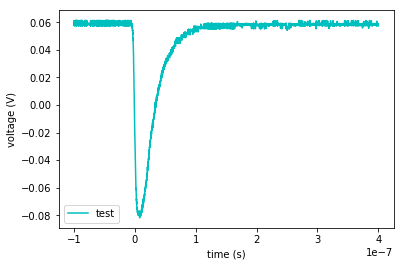

In [18]:
##################################################
##              capture waveforms               ##
##################################################

time, wfm = lecroy.capture_waveforms([
    s["test"],
  ],
    average=1
)

plt.plot(time, wfm[s["test"]], "c" ,label="test")
plt.legend()
plt.xlabel("time (s)")
plt.ylabel("voltage (V)")
plt.show()


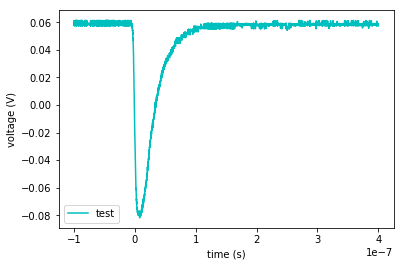

In [19]:
##################################################
##                     plot                     ##
##################################################


plt.plot(time, wfm[s["test"]], "c" ,label="test")
plt.legend()
plt.xlabel("time (s)")
plt.ylabel("voltage (V)")
plt.show()

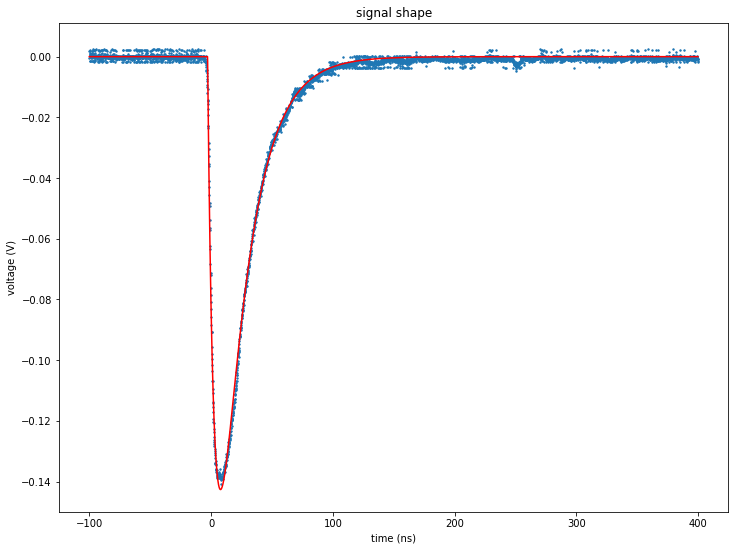

Q:     -1.038e-10
tau1:  5.763e-09
tau2:  2.286e-08
delay: -2.888e-09


In [23]:
from scipy.optimize import curve_fit

from sigproc_kit import * 
from my_utils import *

big_figure()

# no special delimiter needed for tsv
xdata = time
ydata = remove_baseline(wfm[s["test"]])

#plt.plot(xdata*1e9,ydata)

def func(x, Q, tau1, tau2, delay):
    return detector_signal_function(x, Q, tau1, tau2, delay)

popt, pcov = curve_fit(func, xdata, ydata, p0 = [-10e-12,1e-9,2e-9,10e-9])

plt.scatter(xdata*1e9,ydata, s=2)
plt.title("signal shape")
plt.xlabel("time (ns)")
plt.ylabel("voltage (V)")
plt.plot(xdata*1e9, func(xdata, *popt), 'r-')#,
#         label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
#plt.legend()
plt.show()

print("Q:     {:3.3e}".format(popt[0]))
print("tau1:  {:3.3e}".format(popt[1]))
print("tau2:  {:3.3e}".format(popt[2]))
print("delay: {:3.3e}".format(popt[3]))